# Titanic: Machine Learning from Disaster
**Owner: Yuichiro Suzuki**  
**Last update: 20 March, 2017**

## Outline

 - I. Exploratory data analyze
 - II. Data cleaning
 - III. Feature engineering
 - IV. Modeling and prediction
 - V. Submission

## I. Exploratory data analyze

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
sns.set_style("whitegrid")
#sns.set(context="notebook")
%matplotlib inline
warnings.filterwarnings("ignore")

In [50]:
df_train = pd.read_csv("./data/train.csv")

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df_train.shape

(891, 12)

In [53]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [55]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It has been found that train dataset has 891 rows and 12 columns. Age, Cabin, and Embarked features have missing values.  
The data type of the features are below:
- PassengerId: Numerical  
- Pclass: Categorical(Ordinal)
- Name: Categorical (Not structured)
- Sex: Categorical
- Age: Numerical
- SibSp: Numerical
- Parch: Numerical
- Ticket: Categorical (Not structured)
- Fare: Numerical
- Cabin: Categorical
- Embarked: Categorical

In [56]:
numerical = [f for f in df_train.columns if df_train.dtypes[f] != "object"]
categorical = [f for f in df_train.columns if df_train.dtypes[f] == "object"]

In [57]:
print("numerical features: {}".format(numerical))
print("categorical features: {}".format(categorical))

numerical features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


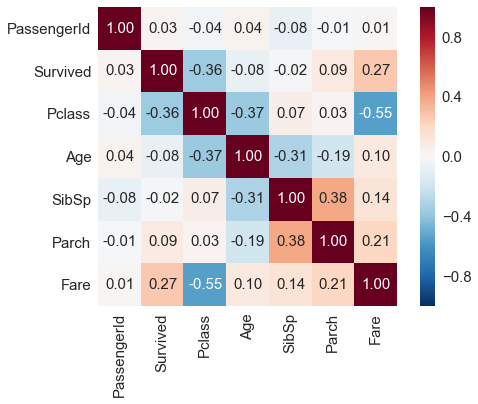

In [58]:
cm = np.corrcoef(df_train[numerical].dropna().values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 15},
    yticklabels=numerical,
    xticklabels=numerical)
plt.show()

Pclass and Fare have relatively high correlations with Survived (target feature). Let's make graphs to see the distribution of the numerical features

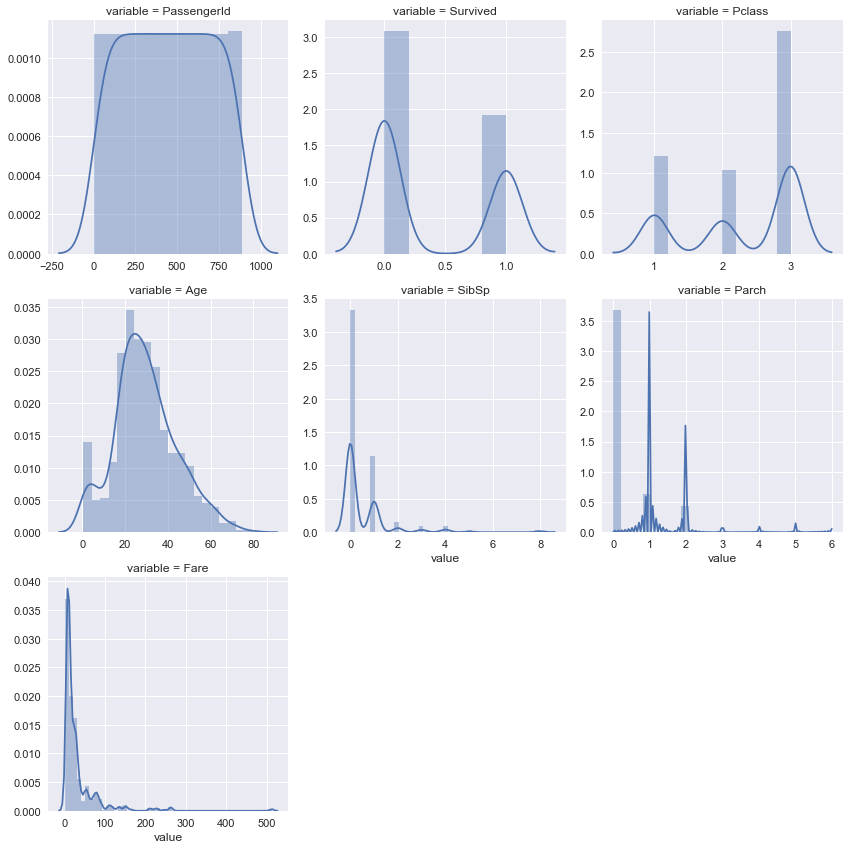

In [59]:
sns.set(font_scale=1.1)
f = pd.melt(df_train, value_vars=numerical)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.distplot, "value")

Only Age and Fare columns have continuous values. The other numerical features have discrete values. Let's see Age and Fare features more closely.

### Age

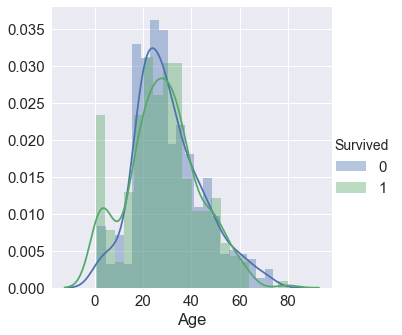

In [60]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(df_train, hue="Survived", size=5)
g.map(sns.distplot, "Age", label="Survived", bins=20)
g.add_legend()
plt.show()

1. The survival rate of the passengers under the age of five is very high.
2. Outliers over the age of 70 have been found.

In [61]:
df_train[(df_train["Age"] <= 5) & (df_train["Survived"] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.00,4,2,347077,31.3875,NaN,S


In [62]:
df_train[df_train["Age"] >= 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


### Fare

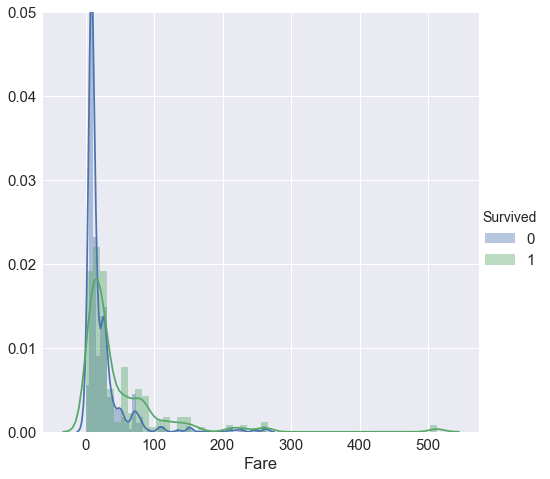

In [63]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(df_train, hue="Survived", size=7, ylim=(0, 0.05))
g.map(sns.distplot, "Fare", label="Survived", bins=50)
g.add_legend()
plt.show()

There are very few passengers whose fare is over $200. Let's check who they are.

In [64]:
df_train[df_train["Fare"] >= 200].sort_values("Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


### Pclass

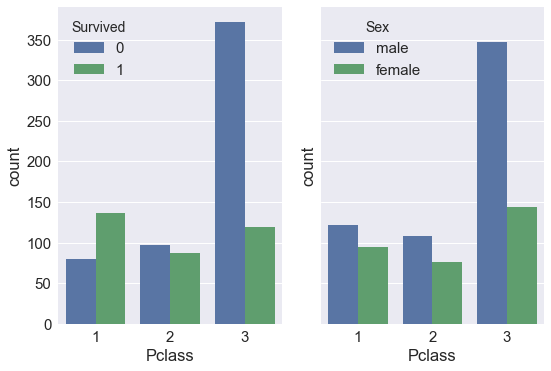

In [65]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharey=True)

sns.countplot("Pclass", data=df_train, hue="Survived", ax=axis1)
sns.countplot("Pclass", data=df_train, hue="Sex", ax=axis2)
plt.tight_layout()

It has been found that the people in the lower class did not survive compared to the people in higher class.

### SibSp

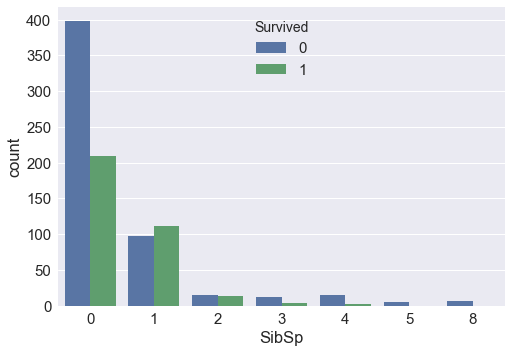

In [66]:
sns.countplot("SibSp", data=df_train, hue="Survived")

In [67]:
df_train[df_train["SibSp"] > 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


### Parch

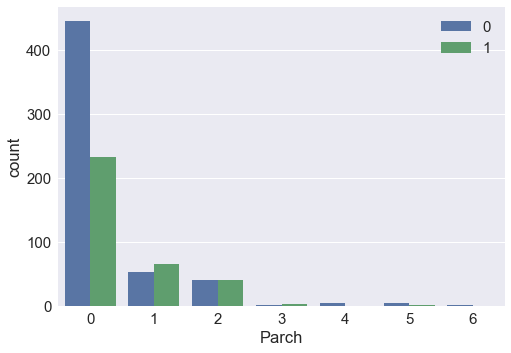

In [75]:
sns.countplot("Parch", data=df_train, hue="Survived")
plt.legend(loc="upper right")

In [69]:
df_train[df_train["Parch"] > 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


## II. Data cleaning

**Combine train and test dataset.**

In [658]:
df_test = pd.read_csv("./data/test.csv")

In [659]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [660]:
df_test.shape

(418, 11)

In [661]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [662]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**It has been found that test data set has the same features as train data set except for the target column.  
Let's combine these two data sets for convinience in feature engineering. **

In [663]:
survived = df_train["Survived"]
df_train.drop("Survived", axis=1, inplace=True)

combined = pd.concat([df_train, df_test])

In [664]:
combined.shape

(1309, 11)

In [665]:
combined.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**Combined dataset has 4 columns with missing values.**

### Missing values on Fare

**Combined dataset has a missing value in Fare column. Let's look at the corresponding data.**

In [666]:
combined[combined.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


**As we saw above, Fare is related with Pclass. So Pclass can be used to predict the missing value of Fare.**

In [667]:
combined.groupby(["Pclass", "Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [668]:
combined = combined.set_value(combined.Fare.isnull(), "Fare", 8.05)
combined[combined.PassengerId==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S


### Missing values on Embarked

**Combined dataset has 2 missing values in Embarked column.**

In [669]:
combined[combined.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**I haven't checked the relationship between Embarked and the other features. It has been mentioned that the embarked is related with fare and pclass in Megan's report.**

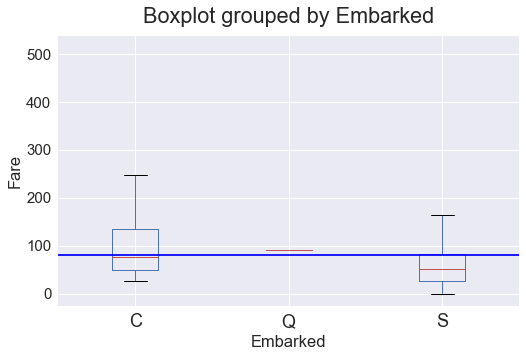

In [670]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax = combined[combined.Pclass==1].boxplot(column="Fare", by="Embarked", ax=ax)
plt.axhline(y=80, color="blue")
ax.set_ylabel("Fare")
ax.set_title("", y=1.1)

**The median value of Fare in Embarked C is close to 80, which is the passenger's Fare. Based on this result, we shold replace the missing value of Embarked with C. **

In [671]:
combined = combined.set_value(combined.Embarked.isnull(), "Embarked", "C")
combined[(combined.PassengerId==62) | (combined.PassengerId==830)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


### Missing values on Cabin

**It is very difficult to predict the missing values of Cabin from the other features because Cabin has many missing values. Let's just replace the missing values in Cabin with "U00", which just means unknown.**

In [672]:
combined = combined.set_value(combined.Cabin.isnull(), "Cabin", "U00")

In [673]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


**Now we have only one column with missing value, which is Age. Age seems to be an important feature to predict Survived and almost 20% of them are missing. So we skip predicting Age and do feature engineering first in order to predict the missing value of Age better.**

## III. Feature engineering

### Deck

In [674]:
combined.Cabin.value_counts()

U00                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
D                     4
B96 B98               4
F4                    4
F2                    4
C78                   4
F33                   4
C22 C26               4
A34                   3
B58 B60               3
B51 B53 B55           3
C101                  3
E34                   3
E101                  3
C52                   2
B22                   2
C62 C64               2
D15                   2
C85                   2
E24                   2
C31                   2
B49                   2
C116                  2
F G73                 2
B5                    2
B69                   2
D33                   2
                   ... 
E68                   1
B42                   1
E52                   1
C95                   1
D6                    1
B4                    1
C130                  1
D38                   1
C47                   1
E49                   1
C118            

In [675]:
combined["Deck"]= combined.Cabin.str[0]
combined.Deck.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [676]:
combined[combined.Deck=="T"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


**There is only one T in Deck and it seems that T is not a valid value. Let's convert T to U.**

In [677]:
combined = combined.set_value(combined.Deck=="T", "Deck", "U")
combined.Deck.value_counts()

U    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

### FamilySize

**It is assumed that the size of family is related to survival because it is reasonable to think that families tend to get along together in the disaster. The related features to family size in the dataset are Parch and SibSp. Let's define Parch + Sibsp + 1 as FamilySize. **

In [678]:
combined["FamilySize"] = combined["Parch"] + combined["SibSp"] + 1
combined["FamilySize"].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

### Discretized family size

In [679]:
def discretize_familysize(row):
    if row["FamilySize"] == 1:
        return "singleton"
    elif (row["FamilySize"] > 1) & (row["FamilySize"] < 5):
        return "small"
    elif row["FamilySize"] >= 5:
        return "large"
    
combined["FsizeD"] = combined.apply(discretize_familysize, axis=1)
combined["FsizeD"].value_counts()

singleton    790
small        437
large         82
Name: FsizeD, dtype: int64

### NameLength

**The people in loyal families have longer names because they tend to have their ancestor's names in their names. So the length of Name can be a promising feature to predict survival better.**

In [680]:
combined["NameLength"] = combined["Name"].apply(lambda x: len(x))
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U00,S,U,2,small,23
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small,51
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U00,S,U,1,singleton,22
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,small,44
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U00,S,U,1,singleton,24


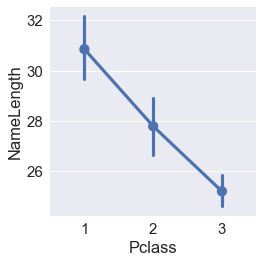

In [681]:
sns.factorplot(x="Pclass", y="NameLength", data=combined)

### Title

In [682]:
combined["Title"] = combined["Name"].map(lambda name: name.split(",")[1].split(".")[0].strip())
combined["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Don               1
Dona              1
Mme               1
Capt              1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

**There are four major titles, which are Mr, Miss, Mrs, and Master and the others are minor or rare titles. So let's put together these rare titles into the major ones.  
I use the median of Age for each title to determine which minor titles should be converted to major ones**

In [683]:
combined.groupby(["Sex", "Title"]).Age.median()

Sex     Title       
female  Dona            39.0
        Dr              49.0
        Lady            48.0
        Miss            22.0
        Mlle            24.0
        Mme             24.0
        Mrs             35.5
        Ms              28.0
        the Countess    33.0
male    Capt            70.0
        Col             54.5
        Don             40.0
        Dr              47.0
        Jonkheer        38.0
        Major           48.5
        Master           4.0
        Mr              29.0
        Rev             41.5
        Sir             49.0
Name: Age, dtype: float64

**The titles can be separated by sex except for Dr.**

In [684]:
def replace_titles(row):
    if row["Title"] in ["Capt", "Col", "Don", "Jonkheer", "Major", "Rev", "Sir"]:
        return "Mr"
    elif row["Title"] in ["Dona", "Lady", "the Countess"]:
        return "Mrs"
    elif row["Title"] in ["Mlle", "Mme", "Ms"]:
        return "Miss"
    elif row["Title"] == "Dr":
        if row["Sex"] == "male":
            return "Mr"
        elif row["Sex"] == "female":
            return "Mrs"
    else:
        return row["Title"]

In [685]:
combined["Title"] = combined.apply(replace_titles, axis=1)
combined["Title"].value_counts()

Mr        782
Miss      265
Mrs       201
Master     61
Name: Title, dtype: int64

**The minor titles are successfully converted to the major ones.**

**Feature engineering is completed. Drop unneccessary features in the dataset**

In [686]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U00,S,U,2,small,23,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small,51,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U00,S,U,1,singleton,22,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,small,44,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U00,S,U,1,singleton,24,Mr


In [687]:
combined.drop(labels=["Name", "Ticket", "Cabin"], axis=1, inplace=True)
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,FsizeD,NameLength,Title
0,1,3,male,22.0,1,0,7.2500,S,U,2,small,23,Mr
1,2,1,female,38.0,1,0,71.2833,C,C,2,small,51,Mrs
2,3,3,female,26.0,0,0,7.9250,S,U,1,singleton,22,Miss
3,4,1,female,35.0,1,0,53.1000,S,C,2,small,44,Mrs
4,5,3,male,35.0,0,0,8.0500,S,U,1,singleton,24,Mr


### Predicting missing values in Age

**We are ready to handle the missing values in the Age column. **  
- Convert categorical data to numerical data
- Feature scaling

In [688]:
combined = pd.get_dummies(combined)
combined.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,NameLength,Sex_female,Sex_male,...,Deck_F,Deck_G,Deck_U,FsizeD_large,FsizeD_singleton,FsizeD_small,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,3,22.0,1,0,7.2500,2,23,0,1,...,0,0,1,0,0,1,0,0,1,0
1,2,1,38.0,1,0,71.2833,2,51,1,0,...,0,0,0,0,0,1,0,0,0,1
2,3,3,26.0,0,0,7.9250,1,22,1,0,...,0,0,1,0,1,0,0,1,0,0
3,4,1,35.0,1,0,53.1000,2,44,1,0,...,0,0,0,0,0,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,1,24,0,1,...,0,0,1,0,1,0,0,0,1,0


In [689]:
passengerid = combined["PassengerId"]
drop_columns = ["PassengerId", "Sex_female", "Embarked_S", "Deck_U", "Title_Master", "FsizeD_large"]
combined.drop(drop_columns, axis=1, inplace=True)

In [690]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
#combined[["Fare", "NameLength"]] = mms.fit_transform(combined[["Fare", "NameLength"]])
combined["Fare"] = mms.fit_transform(combined["Fare"])
combined.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,Pclass,Age,SibSp,Parch,Fare,FamilySize,NameLength,Sex_male,Embarked_C,Embarked_Q,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,FsizeD_singleton,FsizeD_small,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,0.014151,2,23,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,38.0,1,0,0.139136,2,51,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,3,26.0,0,0,0.015469,1,22,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,35.0,1,0,0.103644,2,44,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,3,35.0,0,0,0.015713,1,24,1,0,0,...,0,0,0,0,0,1,0,0,1,0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


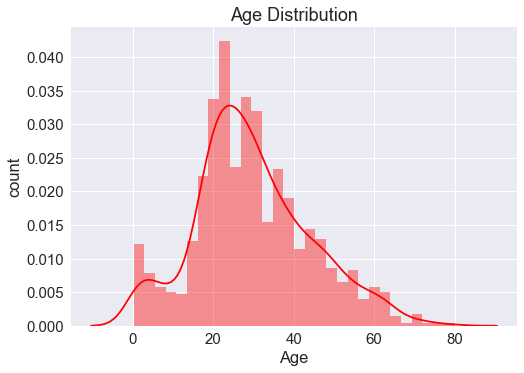

In [691]:
sns.distplot(combined["Age"].dropna(), bins=30, kde=True, color="red")
sns.plt.title("Age Distribution")
plt.ylabel("count")

In [692]:
#Predict missing values in Age
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


def residual_plot(estimator, df, target, predictors, test_size=0.4, random_state=1):
    X_train, X_test, y_train, y_test = train_test_split(df[predictors],
                                                                        df[target],
                                                                        test_size=test_size,
                                                                        random_state=random_state)
    
    estimator.fit(X_train, y_train)
    y_train_pred = estimator.predict(X_train)
    y_test_pred = estimator.predict(X_test)

    # Plotting residual plot
    plt.scatter(y_train_pred, y_train_pred-y_train,
               c="blue", marker="o", label="Training data")
    plt.scatter(y_test_pred, y_test_pred-y_test,
               c="lightgreen", marker="s", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color="red")
    plt.xlim([-10, 80])
    plt.ylim([-60, 60])
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    return plt, r2_train, r2_test, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred


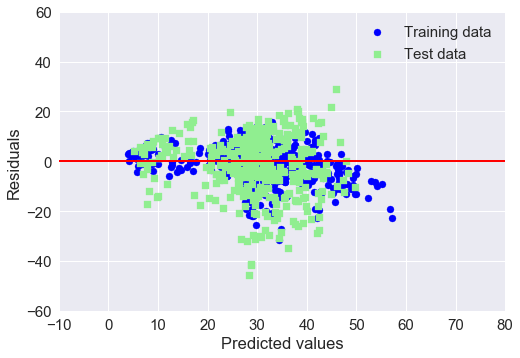

Train: 0.741, Test: 0.407


In [693]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200,
                            max_features="sqrt",
                            random_state=1,
                            criterion="mse",
                            n_jobs=-1,
                            max_depth=10)
df_train_age = combined[combined.Age.notnull()]
predictors = df_train_age.columns.drop(["Age"]) # Use all the features to predict missing Age value

plt, r2_train, r2_test, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = residual_plot(rfr, df_train_age, "Age", predictors)
plt.show()
print("Train: {0:.3f}, Test: {1:.3f}".format(r2_train, r2_test))

 Test data set has much larger residuals than train data set, which indicates that overfitting occures.  

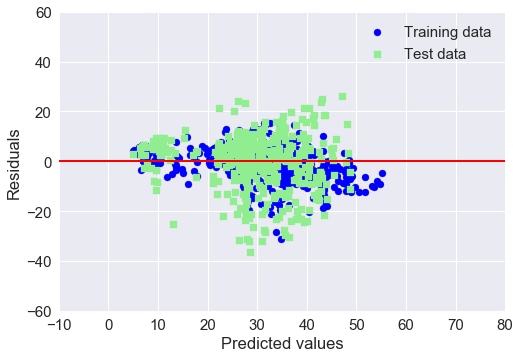

Train: 0.742, Test: 0.443


In [694]:
df_train_age = combined[combined.Age.notnull()]
#df_train_age = df_train_age[df_train_age["Age"] < 60]
df_train_age = df_train_age[df_train_age["Age"] < 70]

#predictors = ["Fare", "Pclass", "Parch", "Title_Mr", "Title_Mrs", "Title_Miss", "SibSp", "FamilySize"]
plt, r2_train, r2_test, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = residual_plot(rfr, df_train_age, "Age", predictors)
plt.show()
print("Train: {0:.3f}, Test: {1:.3f}".format(r2_train, r2_test))

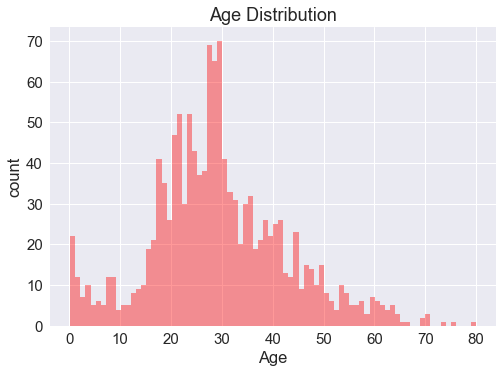

In [695]:
df_train_age = combined[combined.Age.notnull()]
df_train_age = df_train_age[df_train_age["Age"] < 70]
df_test_age = combined[combined.Age.isnull()]

rfr.fit(df_train_age.drop("Age", axis=1), df_train_age["Age"])
predicted_age = rfr.predict(df_test_age.drop("Age", axis=1))
combined.loc[combined["Age"].isnull(), "Age"] = predicted_age

sns.distplot(combined["Age"], bins=80, kde=False, color="red")
sns.plt.title("Age Distribution")
plt.ylabel("count")

In [696]:
combined.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,NameLength,Sex_male,Embarked_C,Embarked_Q,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,FsizeD_singleton,FsizeD_small,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,0.014151,2,23,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,38.0,1,0,0.139136,2,51,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,3,26.0,0,0,0.015469,1,22,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,35.0,1,0,0.103644,2,44,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,3,35.0,0,0,0.015713,1,24,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [697]:
combined["Age"] = mms.fit_transform(combined["Age"])
combined.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,Pclass,Age,SibSp,Parch,Fare,FamilySize,NameLength,Sex_male,Embarked_C,Embarked_Q,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,FsizeD_singleton,FsizeD_small,Title_Miss,Title_Mr,Title_Mrs
0,3,0.273456,1,0,0.014151,2,23,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0.473882,1,0,0.139136,2,51,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,3,0.323563,0,0,0.015469,1,22,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0.436302,1,0,0.103644,2,44,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,3,0.436302,0,0,0.015713,1,24,1,0,0,...,0,0,0,0,0,1,0,0,1,0


## IV. Modeling and prediction

In [698]:
df_train_X = combined.iloc[0:891, :]
df_train_y = survived

df_test_X = combined.iloc[891:, :]

In [699]:
print("train data X: {}".format(df_train_X.shape))
print("test data X: {}".format(df_test_X.shape))

train data X: (891, 22)
test data X: (418, 22)


In [700]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=100, random_state=1, test_size=0.2)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

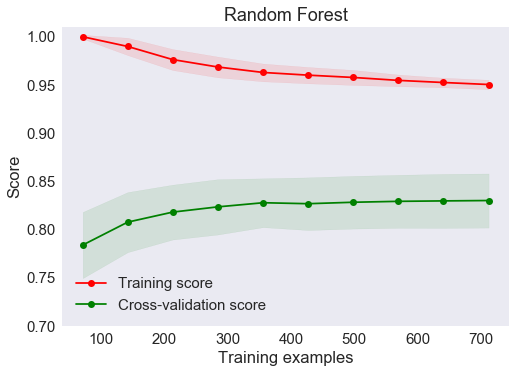

In [701]:
from sklearn.ensemble import RandomForestClassifier

title = "Random Forest"
rfc = RandomForestClassifier(n_estimators=200,
                            max_features="sqrt",
                            random_state=1,
                            n_jobs=-1,
                            max_depth=10)
rfc.fit(df_train_X, df_train_y)
plot_learning_curve(rfc, title, df_train_X, df_train_y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

High variance. Need to reduce features.

### Feature selection

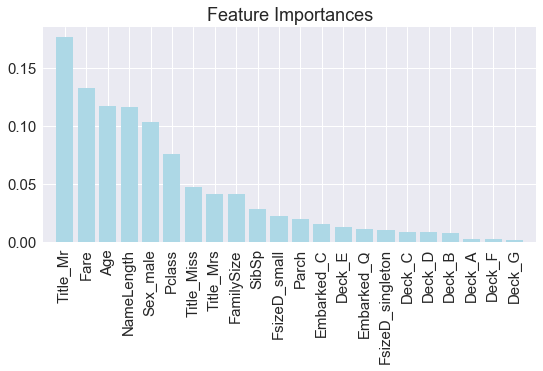

In [702]:
feat_labels = df_train_X.columns[0:]
rfc.fit(df_train_X, df_train_y)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature Importances")
plt.bar(range(df_train_X.shape[1]), importances[indices], color="lightblue", align="center")
plt.xticks(range(df_train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, df_train_X.shape[1]])
plt.tight_layout()
plt.show()

### Random Forest

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

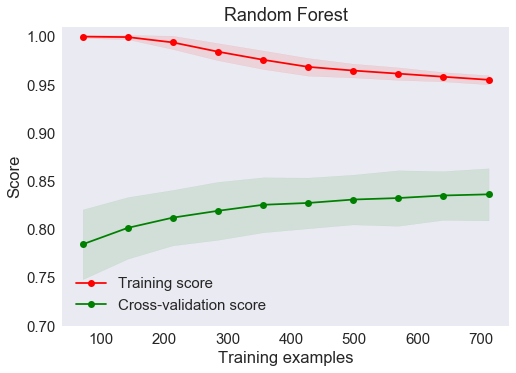

In [710]:
title = "Random Forest"
#selected_features = ["Title_Mr", "Age", "Fare", "Sex_male", "FamilySize"]
selected_features = ["Age", "Fare", "NameLength", "Title_Mr", "Sex_male", "Pclass", "Title_Miss", "Title_Mrs", "FamilySize"]
#rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(df_train_X[selected_features], df_train_y)
plot_learning_curve(rfc, title, df_train_X[selected_features], df_train_y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

### Logistic Regression

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

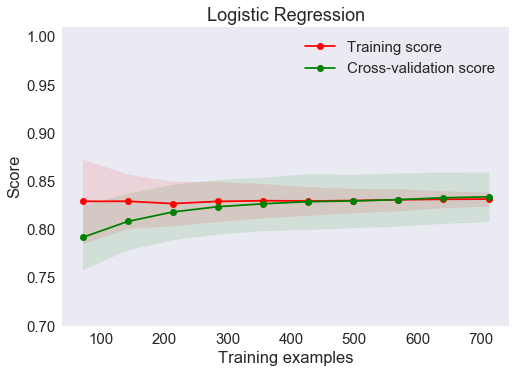

In [711]:
from sklearn.linear_model import LogisticRegression

title = "Logistic Regression"
#selected_features = ["Title_Mr", "Age", "Fare", "Sex_male", "FamilySize"]
lr = LogisticRegression(random_state=1)
lr.fit(df_train_X[selected_features], df_train_y)
plot_learning_curve(lr, title, df_train_X[selected_features], df_train_y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

### AdaBoost

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

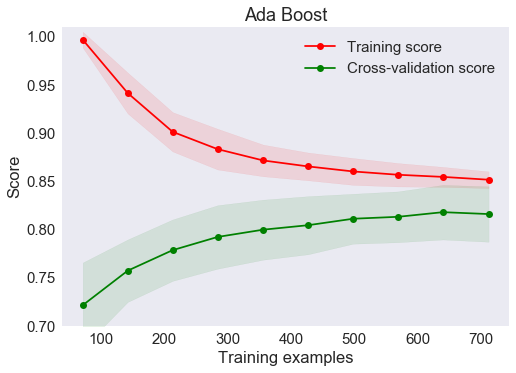

In [712]:
from sklearn.ensemble import AdaBoostClassifier

title = "Ada Boost"
#selected_features = ["Title_Mr", "Age", "Fare", "Sex_male", "FamilySize"]
adb = AdaBoostClassifier()
adb.fit(df_train_X[selected_features], df_train_y)
plot_learning_curve(adb, title, df_train_X[selected_features], df_train_y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

### Ensemble

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

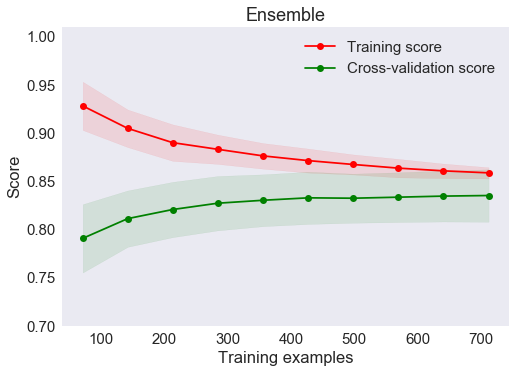

In [713]:
from sklearn.ensemble import VotingClassifier

title = "Ensemble"
selected_features = ["Title_Mr", "Age", "Fare", "Sex_male", "FamilySize"]
clf_en = VotingClassifier(estimators=[("rfc", rfc), ("lr", lr), ("adb", adb)], voting="soft")
clf_en.fit(df_train_X[selected_features], df_train_y)
plot_learning_curve(clf_en, title, df_train_X[selected_features], df_train_y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

## Submission

In [714]:
predictions = clf_en.predict(df_test_X[selected_features])
passerngerid_test = passengerid[891:]
submission = pd.DataFrame({"PassengerId": passerngerid_test, "Survived": predictions})
submission.to_csv("./processed/titanic_submission.csv", index=False)